In [1]:
pip install opencv-python

In [2]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#reading image
img2=cv.imread(r"C:\Users\jyotsnavi\Pictures\josh\f61211e728a482f9db43e841ebe8a01e.jpg")
cv.imshow('mj',img2)
cv.waitKey(60)

-1

In [6]:
cv.destroyAllWindows()

In [ ]:
#reading videos
capture=cv.VideoCapture(r"C:\Users\jyotsnavi\Downloads\Dubstep Bird (Original 5 Sec Video).mp4")
while True:
    isTrue,frame=capture.read()
    if not isTrue:
        break
    cv.imshow('video',frame)
    if cv.waitKey(20) & 0xFF==ord('d'):
        break
capture.release()

In [ ]:
cv.destroyAllWindows()
cv.waitKey(60)

In [ ]:
#resizing image and video
def rescaleFrame(frame,scale):
    #image,videos and live video
    width=int(frame.shape[1]*scale)
    height=int(frame.shape[0]*scale)
    dimensions=(width,height)
    return cv.resize(frame,dimensions,interpolation=cv.INTER_AREA)
def changeRes(width,height):
    #live video
    capture.set(3,width)
    capture.set(4,height)
#reading videos
capture=cv.VideoCapture(r"C:\Users\jyotsnavi\Downloads\Dubstep Bird (Original 5 Sec Video).mp4")
while True:
    isTrue,frame=capture.read()
    if not isTrue:
        break
    frame_resized=rescaleFrame(frame,scale=.5)
    cv.imshow('video',frame)
    cv.imshow('video Resized',frame_resized)
    if cv.waitKey(20)& 0xf==ord('d'):
        break
capture.release()
    
    

In [15]:
#drawing with open cv
blank=np.zeros((500,500,3),dtype='uint8')
cv.imshow('Blank',blank)

In [ ]:
cv.destroyAllWindows()
cv.waitKey(60)

In [ ]:
#2.green box
blank[200:300,300:400]=0,0,255
cv.imshow('Blank',blank)
cv.waitKey(60)

In [ ]:
#draw a rectangle
cv.rectangle(blank,(0,0),
             (blank.shape[1]//2,
              blank.shape[0]//2),
              (0,255,0),thickness=-1)
cv.imshow('Rectangle',blank)
cv.waitKey(60)

In [ ]:
#3.draw a circle
cv.circle(blank,(blank.shape[1]//2,
                 blank.shape[0]//2),
          40,(0,0,255),thickness=-1)
cv.imshow('circle',blank)
#4.draw line
cv.line(blank,(100,250),(300,400),
        (255,255,255),thickness=3)
cv.imshow('line',blank)
#write text
cv.putText(blank,'hello my name is sindhu!!',
          (0,255),
          cv.FONT_HERSHEY_TRIPLEX,1.0,(0,255,0),2)
cv.imshow('text',blank)
cv.waitKey(60)


In [ ]:
cv.destroyAllWindows()

In [7]:
img=cv.imread(r"C:\Users\jyotsnavi\Downloads\WhatsApp Image 2022-10-16 at 3.19.32 PM.jpeg")
cv.imshow('park',img)
cv.waitKey(60)

-1

In [95]:
#converting to gray
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)
cv.waitKey(60)

-1

In [8]:
#blur
blur=cv.GaussianBlur(img,(5,5),cv.BORDER_DEFAULT)
cv.imshow('blur',blur)
cv.waitKey(60)

-1

In [ ]:
cv.destroyAllWindows()

In [9]:
#edge cascade
canny=cv.Canny(blur,125,175)
cv.imshow('canny edges',canny)
cv.waitKey(60)

-1

In [10]:
#dialating the image
dialaied=cv.dilate(canny,(7,7),iterations=3)
cv.imshow('dilated',dialaied)
cv.waitKey(60)

-1

In [ ]:
#eroding
erode=cv.erode(dialaied,(7,7),iterations=3)
cv.imshow('eroded',erode)
cv.waitKey(60)

In [ ]:
#resize
resized=cv.resize(img
                  ,(500,500)
                  ,interpolation=cv.INTER_CUBIC)
cv.imshow('resized',resized)
cv.waitKey(60)


In [ ]:
#cropping
cropped=img[10:250,100:500]
cv.imshow('cropped',cropped)
cv.waitKey(60)

In [96]:
#threshold
thresh=cv.threshold(gray,125,255,cv.THRESH_BINARY)
cv.imshow('thresh',thresh)
cv.waitKey(60)


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - mat is not a numerical tuple
>  - Expected Ptr<cv::cuda::GpuMat> for argument 'mat'
>  - Expected Ptr<cv::UMat> for argument 'mat'


In [88]:
cv.destroyAllWindows()

In [ ]:
#image translation
#translation
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv.warpAffine(img2, M, (img2.shape[1], img2.shape[0]))
cv.imshow("Shifted Down and Right", shifted)

In [ ]:
#rotation
# def rotate(img,angle,rotPoint=None):
#     (height,width)=img.shape[:2]
#     if rotPoint is None:
#         rotPoint=(width//2,height//2)
        
#     rotMat=cv.getRotationMatrix2D(rotPoint,angle=-45,scale=1)
#     dimensions=(width,height)
#     return cv.wrapAffine(img,rotMat,dimensions)
# rotated=rotate(img,angle=-45)
# cv.imshow('rotated',rotated)
# cv.waitKey(60)

In [ ]:
height,width=img.shape[:2]
center=(width/2,height/2)
rotate_matrix=cv.getRotationMatrix2D(center=center,angle=-90,scale=1)
rotated_image=cv.wrapAffine(src=img,m=rotate_matrix,dsize=(width,height))
cv.imshow('rotated image',rotated_image)
cv.imwrite('rotated_image.jpg',rotated_image)

In [ ]:
def rotate(img, angle, center = None, scale = 1.0):
    (h, w) = img.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(img, M, (w, h))

    return rotated
cv.imshow('rotated',rotated)

In [90]:
#flipping
flip=cv.flip(img,-1)
cv.imshow('flip',flip)
cv.waitKey(60)

-1

In [18]:
cv.destroyAllWindows()

In [13]:
contours,hierarchies=cv.findContours(canny,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contour(s) found!')

83 contour(s) found!


In [17]:
cv.drawContours(blank,contours,-1,(0,255,0),1)
cv.imshow('contours Drawn',blank)
cv.waitKey(60)

-1

In [10]:
#color spaces
img=cv.imread(r"C:\Users\jyotsnavi\Pictures\josh\tv-show-friends-chandler-bing-courteney-cox-david-schwimmer-hd-wallpaper-preview.jpg")
cv.imshow('park',img)
cv.waitKey(60)

-1

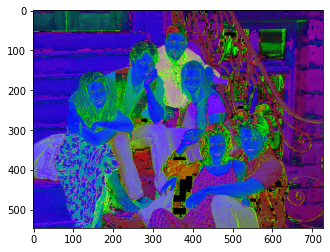

-1

In [14]:
plt.imshow(hsv)
plt.show()
cv.waitKey(60)

In [12]:
#bgr to grayscale
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)
cv.waitKey(60)

-1

In [13]:
#bgr to hsv
hsv=cv.cvtColor(img,cv.COLOR_BGR2HSV)
cv.imshow('hsv',hsv)
cv.waitKey(60)

-1

In [16]:
#bgr to lab
lab=cv.cvtColor(img,cv.COLOR_BGR2LAB)
cv.imshow('lab',lab)
cv.waitKey(60)

-1

In [17]:
#rgb to bgr
rgb=cv.cvtColor(img,cv.COLOR_BGR2RGB)
cv.imshow('rgb',rgb)
cv.waitKey(60)

-1

In [20]:
blank=np.zeros(img.shape[:2],dtype='uint8')
b,g,r=cv.split(img)
blue=cv.merge([b,blank,blank])
green=cv.merge([blank,g,blank])
red=cv.merge([blank,blank,r])
cv.imshow('blue',blue)
cv.waitKey(60)
cv.imshow('green',green)
cv.waitKey(60)
cv.imshow('red',red)
cv.waitKey(60)

-1

In [21]:
print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)


(546, 728, 3)
(546, 728)
(546, 728)
(546, 728)


In [22]:
merged=cv.merge([b,g,r])
cv.imshow('merged image',merged)
cv.waitKey(60)

-1

In [23]:
cv.destroyAllWindows()

In [24]:
img2=cv.imread(r"C:\Users\jyotsnavi\Pictures\josh\f61211e728a482f9db43e841ebe8a01e.jpg")
cv.imshow('mj',img2)
cv.waitKey(60)

-1

In [25]:
#blur
blur=cv.GaussianBlur(img2,(5,5),cv.BORDER_DEFAULT)
cv.imshow('blur',blur)
cv.waitKey(60)

-1

In [26]:
#averaging
average=cv.blur(img,(10,10))
cv.imshow('blur',average)
cv.waitKey(60)

-1

In [30]:
#median blur
median=cv.medianBlur(img,5)
cv.imshow('Median blur',median)
cv.waitKey(60)

-1

In [32]:
#bilateral
bilateral=cv.bilateralFilter(img,10,35,25)
cv.imshow('bilateral',bilateral)
cv.waitKey(60)

-1

In [43]:
cv.destroyAllWindows()

In [35]:
blank=np.zeros((400,400),dtype='uint8')
rectangle=cv.rectangle(blank.copy(),(30,30),(370,370)
                      ,255,-1)
circle=cv.circle(blank.copy(),(200,200),200,255,-1)
cv.imshow('rectangle',rectangle)
cv.imshow('circle',circle)
cv.waitKey(60)

-1

In [37]:
#bitwise AND --->intersecting regions
bitwise_and=cv.bitwise_and(rectangle,circle)
cv.imshow('bitwise AND',bitwise_and)
cv.waitKey(60)

-1

In [38]:
#bitwise or--> non-intersecting and intersectimg
bitwise_or=cv.bitwise_or(rectangle,circle)
cv.imshow('bitwise OR',bitwise_or)
cv.waitKey(60)

-1

In [39]:
#bitwise XOR-->non-intersecting regions
bitwise_xor=cv.bitwise_xor(rectangle,circle)
cv.imshow('bitwise xor',bitwise_xor)
cv.waitKey(60)


-1

In [41]:
#bitwise NOT
bitwise_not=cv.bitwise_not(rectangle,circle)
cv.imshow('bitwise not',bitwise_not)
cv.waitKey(60)

-1

In [22]:
img=cv.imread(r"C:\Users\jyotsnavi\Pictures\Screenshot 2022-10-26 122031.png")
cv.imshow('cats',img)
cv.waitKey(60)


-1

In [23]:
resized=cv.resize(img
                  ,(
    500,400)
                  ,interpolation=cv.INTER_CUBIC)
cv.imshow('resized',resized)
cv.waitKey(60)

-1

In [24]:
blank=np.zeros(img.shape[:2],dtype='uint8')
cv.imshow('blank image',blank)
cv.waitKey(60)

-1

In [25]:
circle=cv.circle(blank.copy()
                ,(img.shape[1]//1+45
                 ,img.shape[0]//2)
                ,100,255,-1)
cv.imshow('circle',circle)
cv.waitKey(60)
rectangle=cv.rectangle(blank.copy()
                      ,(30,30)
                      ,(370,370),255,-1)
cv.imshow('rectangle',rectangle)
cv.waitKey(60)


-1

In [26]:
mask=cv.bitwise_and(circle,rectangle)
cv.imshow('mask',mask)
cv.waitKey(60)

-1

In [27]:
masked=cv.bitwise_and(img,img,mask=mask)
cv.imshow('masked image',masked)
cv.waitKey(60)

-1

In [55]:
cv.destroyAllWindows()

In [29]:
img=cv.imread(r"C:\Users\jyotsnavi\Pictures\Screenshot 2022-10-26 122031.png")
cv.imshow('cats',img)
cv.waitKey(60)

-1

In [30]:
resized=cv.resize(img
                  ,(
    500,400)
                  ,interpolation=cv.INTER_CUBIC)
cv.imshow('resized',resized)
cv.waitKey(60)

-1

In [41]:
#converting to gray
resized=cv.cvtColor(resized,cv.COLOR_BGR2GRAY)
cv.imshow('gray',resized)
cv.waitKey(60)

-1

In [42]:
#grayscale histogram
gray_hist=cv.calcHist([gray]
                     ,[0]
                     ,mask
                     ,[256]
                     ,[0,256])
plt.figure()
plt.title('grayscale Histogram')
plt.xlabel('bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])

NameError: name 'gray' is not defined

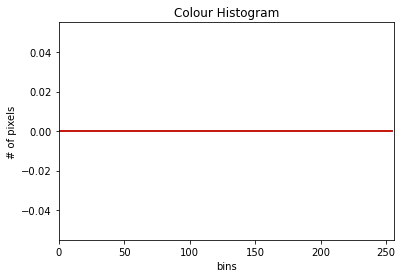

In [43]:
#color Histogram
plt.figure()
plt.title('Colour Histogram')
plt.xlabel('bins')
plt.ylabel('# of pixels')
colors=('b','g','r')
for i,col in enumerate(colors):
    hist=cv.calcHist([img],[i],mask,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])
plt.show()

In [44]:
#thresholding
threshold,thresh=cv.threshold(resized,
                              150,
                              255,
                              cv.THRESH_BINARY)
cv.imshow('simple Thresholded',thresh)
cv.waitKey(60 )

-1

In [45]:
threshold,thresh_inv=cv.threshold(resized
                                 ,150,255
                                 ,cv.THRESH_BINARY_INV)
cv.imshow('simple Threshold Inverse',thresh_inv)
cv.waitKey(60)

-1

In [46]:
#adaptive threshold
adaptive_thresh=cv.adaptiveThreshold(resized
                                    ,255.
                                    ,cv.ADAPTIVE_THRESH_GAUSSIAN_C
                                    ,cv.THRESH_BINARY_INV,11,9)
cv.imshow('adaptive threshold ',adaptive_thresh)
cv.waitKey(60)

-1

In [51]:
#sobel
sobelx=cv.Sobel(resized,cv.CV_64F,1,0)
sobely=cv.Sobel(resized,cv.CV_64F,0,1)
combined_sobel=cv.bitwise_or(sobelx,sobely)
cv.imshow('Sobel x',sobelx)
cv.imshow('sobel y',sobely)
cv.imshow('combined sobel',combined_sobel)
cv.waitKey(60)


-1

In [53]:
#laplacian
lap=cv.Laplacian(resized,cv.CV_64F)
lap=np.uint8(np.absolute(lap))
cv.imshow('laplacian',lap)
cv.waitKey(60)

-1

In [54]:
canny=cv.Canny(resized,150,175)
cv.imshow('canny',canny)
cv.waitKey(60)

-1